## Library Import

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

## Plot Dataset

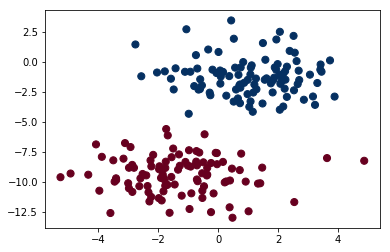

In [2]:
X, y = make_blobs(200, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

## Intuition of Generative Model

Intuition of Generative Model


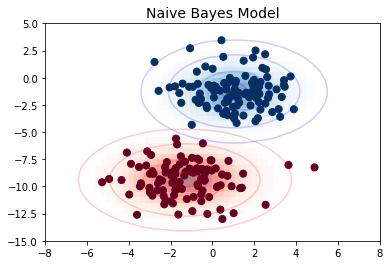

In [3]:
X, y = make_blobs(200, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)
print("Intuition of Generative Model")
#fig.savefig('./NB_example.png')

## Naive Bayes Classification

In [4]:
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

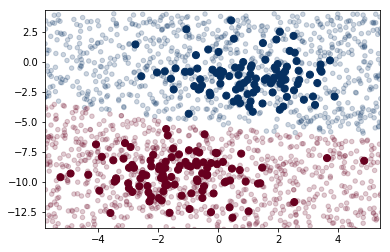

In [5]:
#training data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()

#new data
alpha = 0.2 #opacity degree
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=alpha)
plt.axis(lim);

## Exercise: Multi-modal Distribution Example

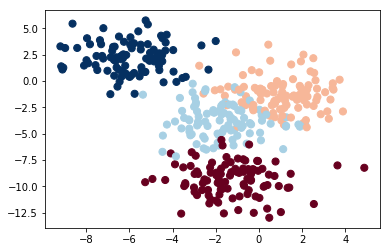

In [17]:
# example of multi modal dataset
X, y = make_blobs(400, 2, centers=4, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

Intuition of Generative Model


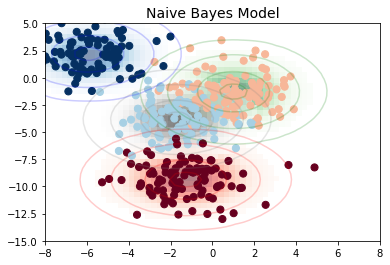

In [22]:
# Naive Bayes Model for multi modal classfication
# using color list: ['red', 'green', 'grey', 'blue']
fig, ax= plt.subplots()

ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim=(-8,8)
ylim=(-15,5)
xg=np.linspace(xlim[0],xlim[1], 60)
yg=np.linspace(ylim[0],ylim[1],40)
xx, yy=np.meshgrid(xg,yg)
Xgrid=np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'green','grey','blue']):
    mask=(y==label)
    mu, std= X[mask].mean(0), X[mask].std(0)
    P=np.exp(-0.5*(Xgrid-mu)**2/std**2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)
print("Intuition of Generative Model")
#fig.savefig('./NB_example.png')

In [23]:
# training & testing NB model
# Xnew = [-9, -13] + [14, 18] * rng.rand(2000, 2)
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-9, -13] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

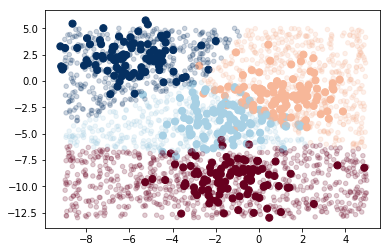

In [24]:
#training data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()

#new data
alpha = 0.2 #opacity degree
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=alpha)
plt.axis(lim);